In [6]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity



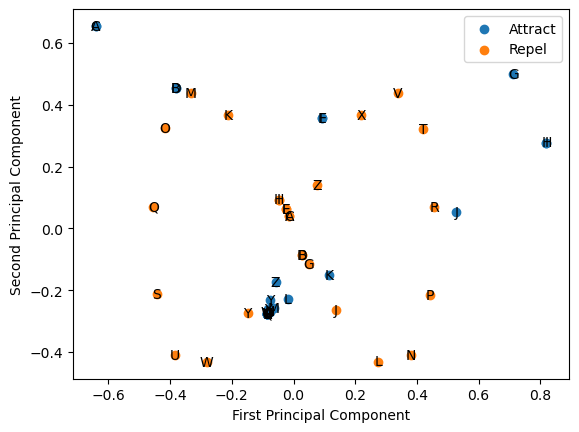

In [29]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Creating a more complicated graph
G = nx.Graph()
G.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('A', 'D'),
    ('B', 'C'),
    ('B', 'E'),
    ('C', 'D'),
    ('D', 'F'),
    ('E', 'F'),
    ('E', 'G'),
    ('F', 'G'),
    ('G', 'H'),
    ('G', 'I'),
    ('H', 'I'),
    ('H', 'J'),
    ('I', 'J'),
    ('J', 'K'),
    ('K', 'L'),
    ('L', 'M'),
    ('M', 'N'),
    ('N', 'O'),
    ('O', 'P'),
    ('P', 'Q'),
    ('Q', 'R'),
    ('R', 'S'),
    ('S', 'T'),
    ('T', 'U'),
    ('U', 'V'),
    ('V', 'W'),
    ('W', 'X'),
    ('X', 'Y'),
    ('Y', 'Z'),
])

# Constructing adjacency matrix
A = nx.adjacency_matrix(G)

# Convert to dense matrix
A_dense = A.toarray()

# Solve the nuclear norm minimization problem
N = A_dense.shape[0]
M = cp.Variable((N, N), symmetric=True)
constraints = [M[i, j] == A_dense[i, j] for i in range(N) for j in range(N) if i != j]
problem = cp.Problem(cp.Minimize(cp.norm(M, "nuc")), constraints)
problem.solve()

M_hat = M.value

# Compute the eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(M_hat)

# Separate negative and positive eigenvalues/eigenvectors
negative_indices = eigenvalues < 0
positive_indices = eigenvalues > 0

D_negative = np.diag(np.abs(eigenvalues[negative_indices]))
D_positive = np.diag(eigenvalues[positive_indices])

Q_negative = eigenvectors[:, negative_indices]
Q_positive = eigenvectors[:, positive_indices]

# Define A and R
A = np.dot(Q_positive, np.sqrt(D_positive))
R = np.dot(Q_negative, np.sqrt(D_negative))

# Visualize the embeddings
pca = PCA(n_components=2)

A_pca = pca.fit_transform(A)
R_pca = pca.fit_transform(R)

# Add labels to the scatter plot
labels = list(G.nodes())

# Add labels to the scatter plot
A_labels = list(G.nodes())
R_labels = list(G.nodes())

plt.scatter(A_pca[:, 0], A_pca[:, 1], label='Attract')
plt.scatter(R_pca[:, 0], R_pca[:, 1], label='Repel')

for i, label in enumerate(A_labels):
    plt.text(A_pca[i, 0], A_pca[i, 1], label, ha='center', va='center', color='black')

for i, label in enumerate(R_labels):
    plt.text(R_pca[i, 0], R_pca[i, 1], label, ha='center', va='center', color='black')

plt.legend()
# Add axis labels
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()


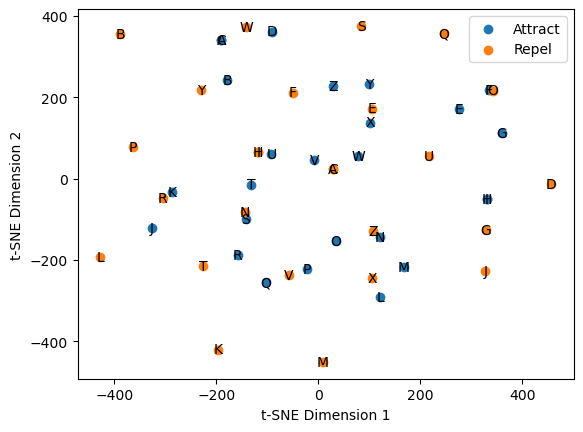

In [33]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Creating a more complicated graph
G = nx.Graph()
G.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('A', 'D'),
    ('B', 'C'),
    ('B', 'E'),
    ('C', 'D'),
    ('D', 'F'),
    ('E', 'F'),
    ('E', 'G'),
    ('F', 'G'),
    ('G', 'H'),
    ('G', 'I'),
    ('H', 'I'),
    ('H', 'J'),
    ('I', 'J'),
    ('J', 'K'),
    ('K', 'L'),
    ('L', 'M'),
    ('M', 'N'),
    ('N', 'O'),
    ('O', 'P'),
    ('P', 'Q'),
    ('Q', 'R'),
    ('R', 'S'),
    ('S', 'T'),
    ('T', 'U'),
    ('U', 'V'),
    ('V', 'W'),
    ('W', 'X'),
    ('X', 'Y'),
    ('Y', 'Z'),
])

# Visualize the embeddings using t-SNE
tsne = TSNE(n_components=2, perplexity=10)

A_tsne = tsne.fit_transform(A)
R_tsne = tsne.fit_transform(R)

plt.scatter(A_tsne[:, 0], A_tsne[:, 1], label='Attract')
plt.scatter(R_tsne[:, 0], R_tsne[:, 1], label='Repel')

# Add labels to the scatter plot
A_labels = list(G.nodes())
R_labels = list(G.nodes())

for i, label in enumerate(A_labels):
    plt.text(A_tsne[i, 0], A_tsne[i, 1], label, ha='center', va='center', color='black')

for i, label in enumerate(R_labels):
    plt.text(R_tsne[i, 0], R_tsne[i, 1], label, ha='center', va='center', color='black')

# Add axis labels
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.legend()
plt.show()

In [13]:
# Example of link prediction using cosine similarity

# Create a similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(A)

# Generate all possible node pairs that are not connected in the original graph
missing_edges = list(nx.non_edges(G))

# Compute cosine similarity for missing edges
predicted_scores = []
for u, v in missing_edges:
    u_idx = list(G.nodes).index(u)
    v_idx = list(G.nodes).index(v)
    score = similarity_matrix[u_idx, v_idx]
    predicted_scores.append((u, v, score))

# Sort the predicted scores in descending order
predicted_scores = sorted(predicted_scores, key=lambda x: x[2], reverse=True)

# Evaluate the link prediction performance (e.g., precision, recall, AUC, etc.)
# based on the true positive links in the missing_edges list


In [14]:
norm_A = np.linalg.norm(A)
norm_R = np.linalg.norm(R)
heterophily_ratio = norm_R ** 2 / (norm_A ** 2 + norm_R ** 2)
print("Heterophily ratio:", heterophily_ratio)


Heterophily ratio: 0.31197414707411286


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyGCNModel(nn.Module):
    def __init__(self, adj_matrix, features, hidden_dim, num_classes):
        super(MyGCNModel, self).__init__()
        self.adj_matrix = adj_matrix
        self.features = features
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes

        self.gc1 = GraphConvolution(features.shape[1], hidden_dim)
        self.gc2 = GraphConvolution(hidden_dim, num_classes)

    def forward(self, x):
        x = F.relu(self.gc1(x, self.adj_matrix))
        x = self.gc2(x, self.adj_matrix)
        return F.log_softmax(x, dim=1)

class GraphConvolution(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolution, self).__init__()
        self.weight = nn.Parameter(torch.FloatTensor(input_dim, output_dim))
        self.bias = nn.Parameter(torch.FloatTensor(output_dim))

    def forward(self, x, adj):
        x = torch.mm(x, self.weight)
        x = torch.spmm(adj, x)
        return x + self.bias


In [23]:
import numpy as np

# Sample data for A_dense (adjacency matrix)
A_dense = np.array([[0, 1, 1, 0, 0],
                    [1, 0, 1, 1, 0],
                    [1, 1, 0, 0, 1],
                    [0, 1, 0, 0, 1],
                    [0, 0, 1, 1, 0]])

# Sample data for node_features
node_features = np.array([[0.2, 0.3, 0.5],
                          [0.4, 0.1, 0.5],
                          [0.1, 0.6, 0.3],
                          [0.7, 0.2, 0.1],
                          [0.3, 0.4, 0.3]])

# Sample values for hidden_dim and num_classes
hidden_dim = 64
num_classes = 2


In [25]:
# Assume you have adjacency matrix `A_dense`, node features `node_features`, and the attract-repel matrices `A` and `R`

class AttractRepelGCNModel(MyGCNModel):
    def __init__(self, adj_matrix, features, A, R, hidden_dim, num_classes):
        super().__init__(adj_matrix, features, hidden_dim, num_classes)
        self.A = A
        self.R = R

    def forward(self, x):
        x = super().forward(x)

        # Concatenate the A and R matrices with the output of the GCN layers
        x = torch.cat([x, self.A, self.R], dim=1)

        # Continue with the rest of your GCN model operations

        return x

# Initialize and train the AttractRepelGCNModel
hidden_dim = 64  # Example hidden dimension
num_classes = 2  # Example number of classes
model = AttractRepelGCNModel(A_dense, node_features, A, R, hidden_dim, num_classes)
# Train the model using your dataset and task-specific training routine
